# Explore National Dataset

This notebook is used to explore the `rivm-covid-19-national.csv` dataset. It contains various graph that visualize the data in the dataset.

In [1]:
import pandas as pd
import numpy as np

## Load dataset

In [2]:
df = pd.read_csv("../data/processed/rivm-covid-19-national.csv")

In [3]:
df["PositiefGetest"] = df["PositiefGetest"].astype(int)
df["Opgenomen"] = df["Opgenomen"].astype(int)
df["Overleden"] = df["Overleden"].astype(int)
df["Datum"] = pd.to_datetime(df["Datum"])

## Inspect dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   PositiefGetest  62 non-null     int64         
 1   Opgenomen       62 non-null     int64         
 2   Overleden       62 non-null     int64         
 3   Datum           62 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(3)
memory usage: 2.1 KB


In [5]:
df.head()

,PositiefGetest,Opgenomen,Overleden,Datum
0,1,0,0,2020-02-27
1,2,0,0,2020-02-28
2,7,0,0,2020-02-29
3,10,0,0,2020-03-01
4,18,0,0,2020-03-02


In [6]:
df.tail()

,PositiefGetest,Opgenomen,Overleden,Datum
57,36535,10281,4289,2020-04-24
58,37190,10381,4409,2020-04-25
59,37845,10456,4475,2020-04-26
60,38245,10521,4518,2020-04-27
61,38416,10609,4566,2020-04-28


## Visualize total (per day)

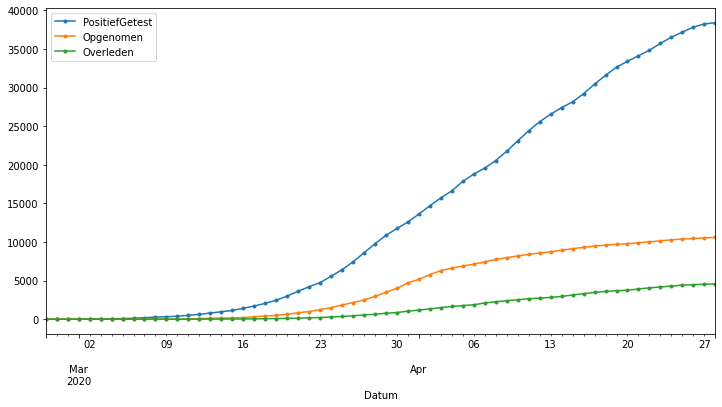

In [7]:
df.plot(
    x="Datum",
    y=["PositiefGetest", "Opgenomen", "Overleden"],
    figsize=(12,6),
    style=".-",
)

## Visualize difference (per day)

In [8]:
df["PositiefGetestDiff"] = df["PositiefGetest"].diff()
df["OpgenomenDiff"] = df["Opgenomen"].diff()
df["OverledenDiff"] = df["Overleden"].diff()

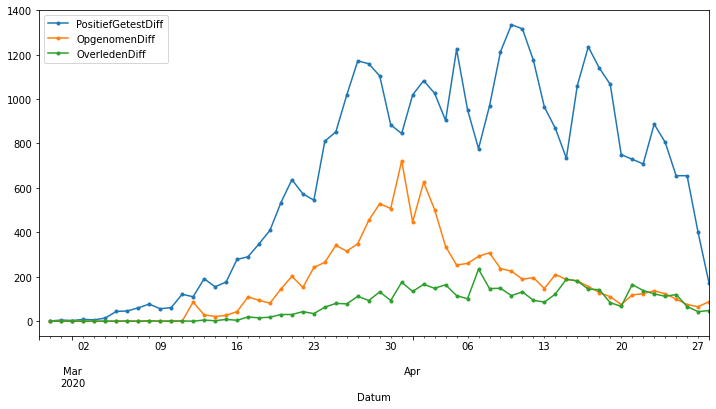

In [9]:
df.plot(
    x="Datum",
    y=["PositiefGetestDiff", "OpgenomenDiff", "OverledenDiff"],
    figsize=(12,6),
    style=".-",
)